<h1><center>Laboratorio 8: Predicciones y Recomendaciones 🔮🪄 </center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### **Cuerpo Docente:**

- **Profesores:** Ignacio Meza, Sebastián Tinoco
- **Auxiliares:** Catherine Benavides, Consuelo Rojas
- **Ayudante:** Nicolás Ojeda, Eduardo Moya

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Diego Cornejo

### **Link de repositorio de GitHub:** `https://github.com/diegonachon/mds7202/tree/main/lab8`

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [1]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

# **Forecasting (3.0 puntos)**


## **Prophet, teoria**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **Prophet, práctica**

<center>
<img src ="https://static.wikia.nocookie.net/31minutos/images/d/d1/Don_Sergio.png/revision/latest?cb=20190926222900" width = 250 />

Don Sergio quiere entrenar para participar en la maratón y como sabe que correr una maratón requiere de entrenamiento y una dieta balanceada.

Por ello, necesita empezar a comer más balanceado, pero también necesita saber que tanto le va a costar esto, de manera de poder agregarlo a su presupuesto.

Es así como ustedes tendrán que ayudar a Don Sergio a cumplir su sueño de correr la maratón de Santiago, manteniendo su economía del hogar que comparte con su espora Emerilda.

**Datos**

Para poder ayudar a Don Sergio, harán uso del dataset `fruit_vegetables.csv`que contiente las siguientes columnas:

*   `SN:` Serial Number.
*   `Commodity:` Nombre de las frutas o verduras.
* `Date:` Fecha del registro.
* `Unit:` Unidad del precio.
* `Minumum:` Precio mínimo de venta.
* `Maximum:` Precio máximo de venta.
* `Average:` Precio promedio de venta.




In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


### **1. Serie de Tiempo**


#### **1.1 Pre-procesamiento**

Tareas de la sección:


1.   Identificar elementos necesarios para generar la serie de tiempo.
2.   Gráficar datos.
3.   Ver la existencia de tendencias, estacionalidades o ruido.
4.   Dividir datos para tener set de entrenamiento (80%) y testeo (20%). Graficar.

---





**Comida de Don Sergio**

Don Sergio quiere nutricer lo mejor posible durante su tiempo de entrenamiento, por lo que necesita agregar más frutas y verduras a su dieta. Es por ello que decidío añadir los siguientes elementos a su compra diaria.

*   Tomates
*   Lechuga
*   Manzana
*   Plantanos
*   Tofu

**Nota:** Don Sergio prefiere comprar productos locales, compra un Kg diario de cada cosa y a precio promedio.

**Respuesta:**

**P1**

In [3]:
# Leer dataset
df = pd.read_csv('fruit_vegetables.csv')

In [4]:
df.head()

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5
1,1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0
2,2,Potato Red,2013-06-16,Kg,20.0,21.0,20.5
3,3,Potato White,2013-06-16,Kg,15.0,16.0,15.5
4,4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0


**<font color="red">DISCLAIMER!</font>**

**<font color="red">Se asume que una docena de plátanos equivale a 1 Kg.</font>**

**<font color="red">FIN DE DISCLAIMER!</font>**

In [5]:
# Crear máscara con elementos de búsqueda y seleccionar

diet_list = ['Tomato Small(Local)', 'Lettuce', 'Apple(Fuji)', 'Banana', 'Tofu']
df = df[df['Commodity'].isin(diet_list)]
df.head()

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
1,1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0
40,40,Lettuce,2013-06-16,Kg,55.0,60.0,57.5
48,48,Tofu,2013-06-16,Kg,55.0,60.0,57.5
51,51,Banana,2013-06-16,Doz,70.0,80.0,75.0
75,75,Tomato Small(Local),2013-06-17,Kg,20.0,25.0,22.5


In [6]:
# Agrupar por fecha en la columna average y sumar, obtener serie de tiempo
df_ = df.groupby('Date', as_index = False).sum('Average')
df_['Date'] = pd.to_datetime(df_['Date'])
df_ = df_[['Date', 'Average']]
df_.head()

,Date,Average
0,2013-06-16,219.0
1,2013-06-17,202.5
2,2013-06-18,194.0
3,2013-06-19,216.0
4,2013-06-20,204.0


**P2**

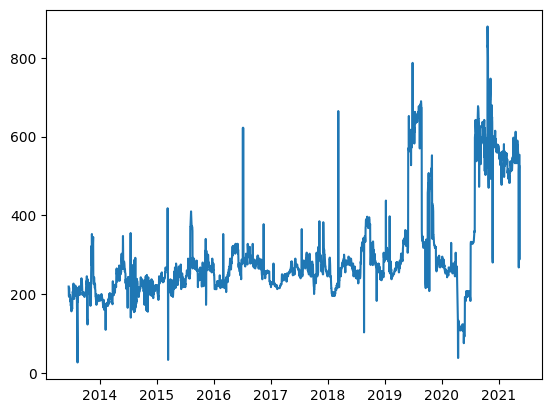

In [7]:
# Graficar serie de tiempo

plt.plot(df_['Date'], df_['Average'])

**P3**

Se utiliza un *period* de 365, dado que se quiere estudiar el ciclo de un año. A partir de la descomposición realizada, se observa que existe una Tendencia al alza, hay Estacionalidad y Ruido.

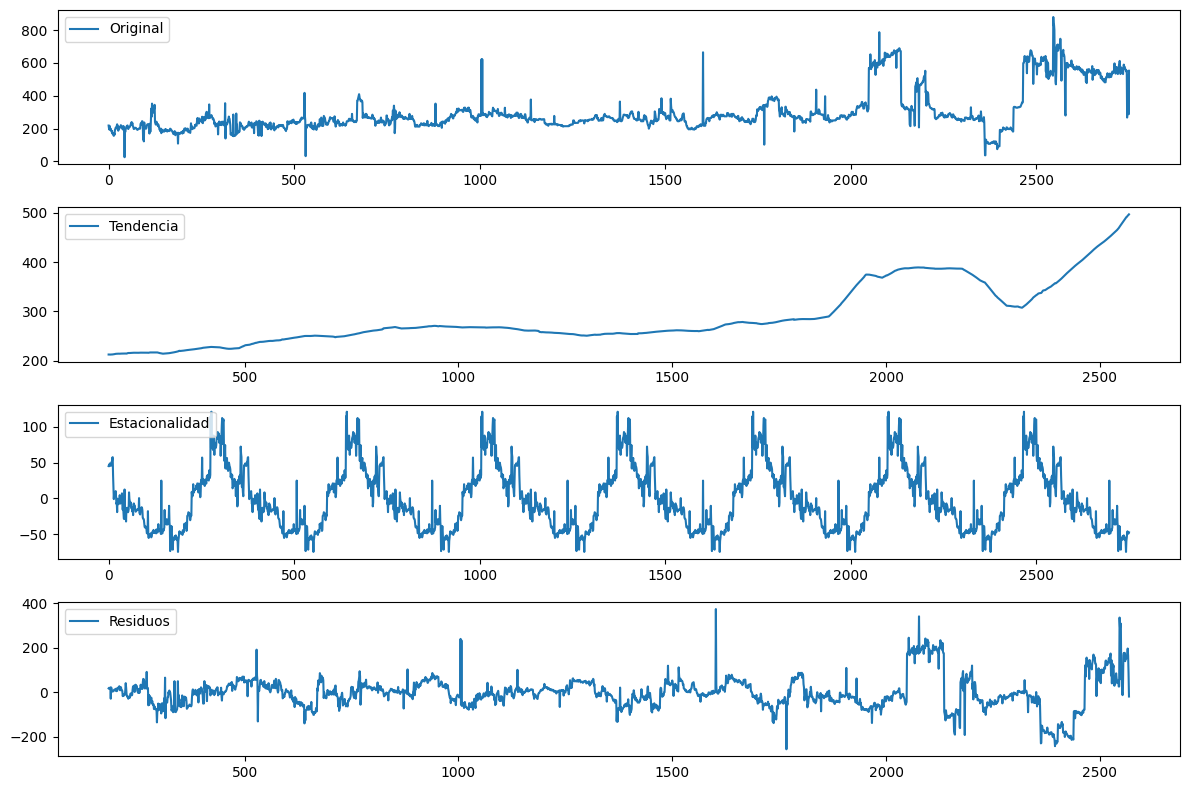

In [8]:
# Realizar descomposición de la señal, utilizado seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_['Average'], model='additive', period = 365)

trend = decomposition.trend
seasonal = decomposition.seasonal
resid = decomposition.resid

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df_['Average'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Tendencia')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Estacionalidad')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(resid, label='Residuos')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

**P4**

In [9]:
# Realizar Hold Out de 80/20

df_train = df_.iloc[ : round(len(df_)*0.8), :]
df_test = df_.iloc[ round(len(df_)*0.8) : , :]

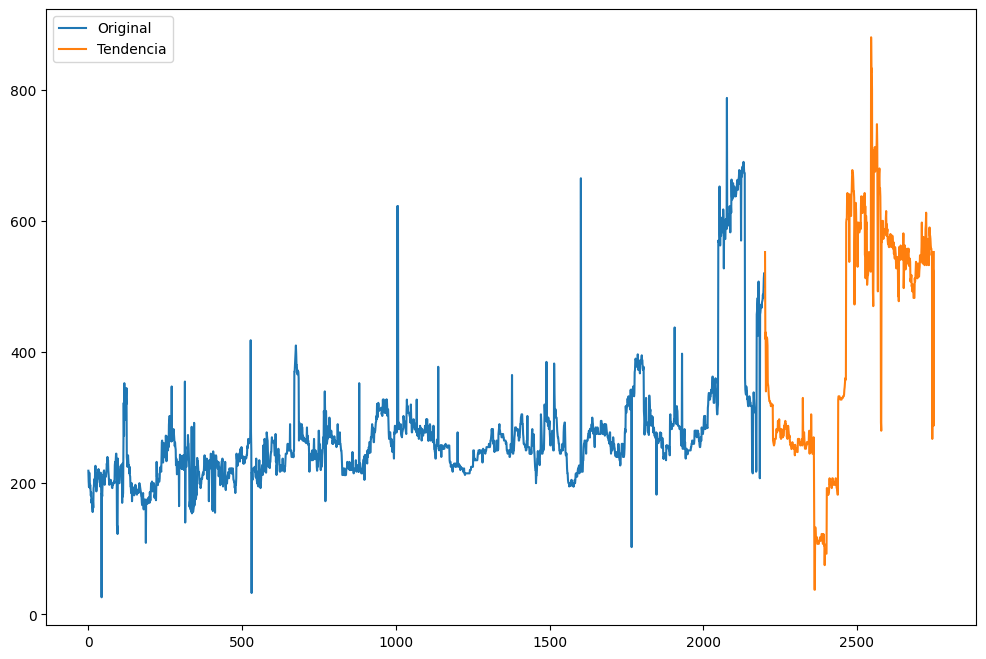

In [10]:
plt.figure(figsize=(12, 8))

plt.subplot()
plt.plot(df_train['Average'], label='Original')
plt.legend(loc='upper left')

plt.subplot()
plt.plot(df_test['Average'], label='Tendencia')
plt.legend(loc='upper left')

#### **1.2 Modelo Prophet**

A continuación se genera un modelo Prophet para la predicción. Para ello se tiene que:
1. Crear dataset, donde columna de tiempo tiene que ir en formate YYYY-MM-DD con el nombre de `ds` y columna objetivo con nombre `y`.
2. Entrenar modelo.
3. Generar predicción. Notar que el dataframe de predicción solo contiene una columna con nombre `ds`, al inicio.

In [11]:
#instalamos prophet
# !pip install prophet

In [12]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly


**1. Generar dataframes de entrenamiento y testeo**

In [13]:
df_train.columns = ['ds', 'y']
df_test.columns = ['ds', 'y']

**2. Modelo y entrenamiento**

In [14]:
# Respuesta, tal vez si menciono más arriba que prophet usar la sintaxis de sklearn esto lo hacen solitos nomas
model = Prophet()
model.fit(df_train)

23:07:31 - cmdstanpy - INFO - Chain [1] start processing
23:07:32 - cmdstanpy - INFO - Chain [1] done processing


**3. Predicción.**

¿Qué muestra el dataframe de predicción una vez realizada la predicción? ¿Qué siginifican las distintas columnas?

**Respuesta**

Una vez realizada la predicción, se genera un *dataframe* que contiene la fecha (*ds*) y las predicciones realizadas para esta, conteniendo las siguientes variables:

* **trend**: Corresponde a la tendencia de la serie temporal, sin considerar la estacionalidad y otros eventos. También se encuentra la variante con *lower*, que indica el límite inferior de la predicción; y *upper*, que indica el límite superior de la predicción.

* **yhat** : Corresponde a la predicción del valor de la serie temporal para la fecha *ds* generada por el modelo. Además, se encuentra la variante con *lower*, que indica el límite inferior de la predicción; y *upper*, que indica el límite superior de la predicción.

* **aditive_terms**: Corresponde a la suma de los componentes aditivos, como lo son estacionalidades y otros eventos. Además, se encuentra la variante con *lower*, que indica el límite inferior de la predicción; y *upper*, que indica el límite superior de la predicción.

* **estacionalidad**: Se tienen las componentes estacionales por semana (*weekly*) y anual (*yearly*), que indican la contribución de cada componente estacional en la predicción, teniendo las variantes de *lower* y *upper* para indicar el límite superior e inferior de la predicción, respectivamente.

* **multiplicative_terms**: Similar a *aditive_terms*, corresponde a la suma de las componentes multiplicativas; además de las variantes por límite inferior y superior (*lower* y *upper*). Como se utilizó un modelo aditivo, estas columnas estan compuestas de 0.


In [15]:
forecast = model.predict(df_test)

**Gráficos de resultados**


Ahora, vemos el resultado de la predicción hecha a través de los gráficos que vienen implementados en la libreria.

Se tienen gráficos de la predicción del modelo y descomposición por componentes.

/opt/conda/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


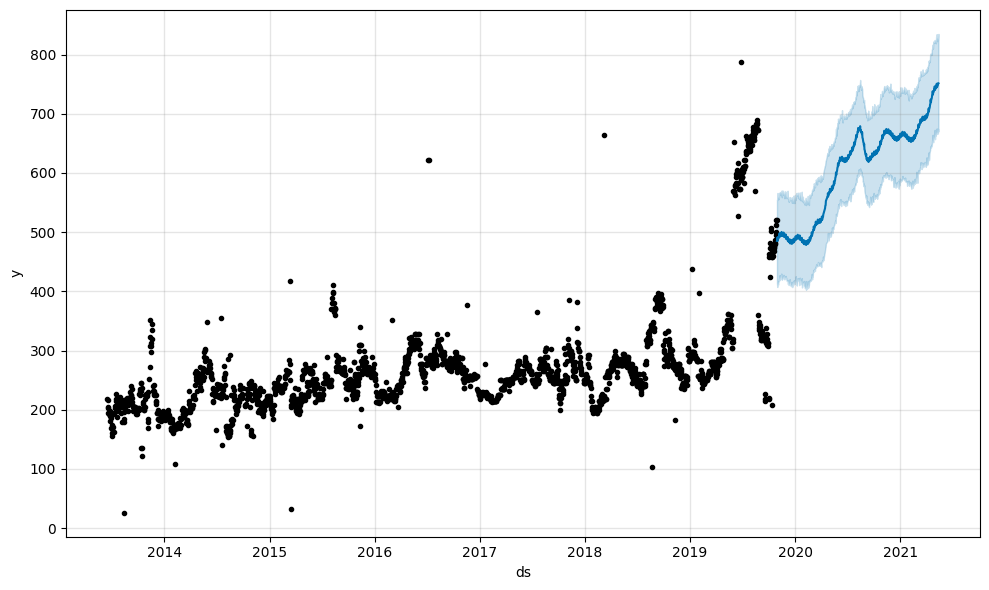

In [16]:
# plot forecast, estático.
# f, ax = plt.subplot()
# f.set_figheight(5)
# f.set_figwidth(15)
fig = model.plot(forecast)
fig.show()

/opt/conda/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

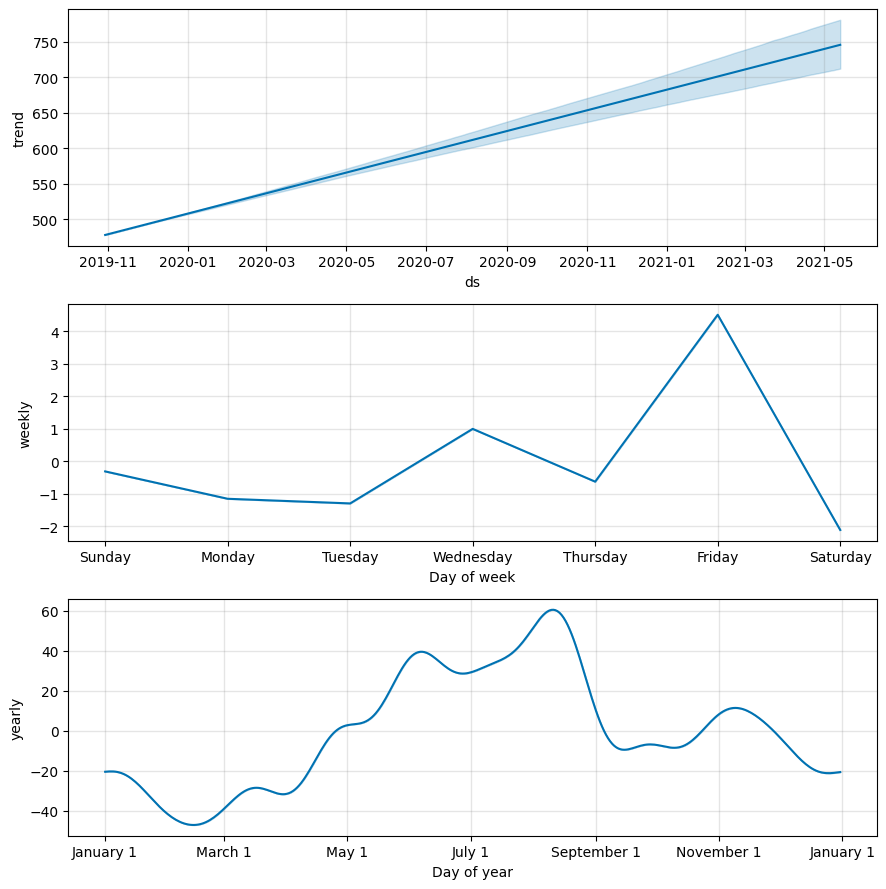

In [17]:
# descomposición por componentes, estático
fig = model.plot_components(forecast)

#### **1.3 Resultados y métricas**

En la presente sección se van a ver los resultados de la predicción, comparando con los resultados originales, así se obtienen métricas de error. Para ello se hacen los siguientes pasos:
1. Inspeccionar gráfica de predicción con los datos reales. Agregar tres vistas: predicción del primer 15% de los datos, 50% de los datos y 100% de la predicción.
2. Calcular métricas de error (RMSE, MAE, MAPE).

In [18]:
def plot_predictions(df_test, forecast, percentage):
    total_points = len(df_test)
    cut_off = int(total_points * percentage)
    
    plt.figure(figsize=(20, 4))
    plt.plot(df_test['ds'][:cut_off], df_test['y'][:cut_off], label='Datos reales')
    plt.plot(forecast['ds'][:cut_off], forecast['yhat'][:cut_off], label='Predicciones')
    plt.fill_between(forecast['ds'][:cut_off], forecast['yhat_lower'][:cut_off], forecast['yhat_upper'][:cut_off], color='k', alpha=0.2)
    plt.xlabel('Fecha')
    plt.ylabel('Valor')
    plt.title(f'Predicción y datos reales ({int(percentage * 100)}% del set de testeo)')
    plt.legend()
    plt.show()

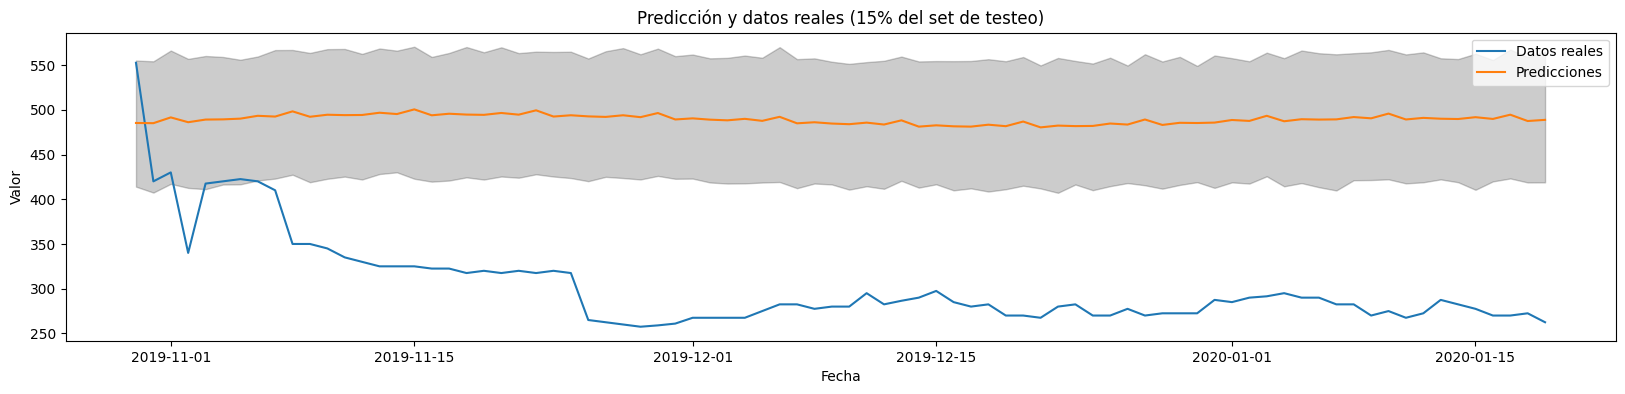

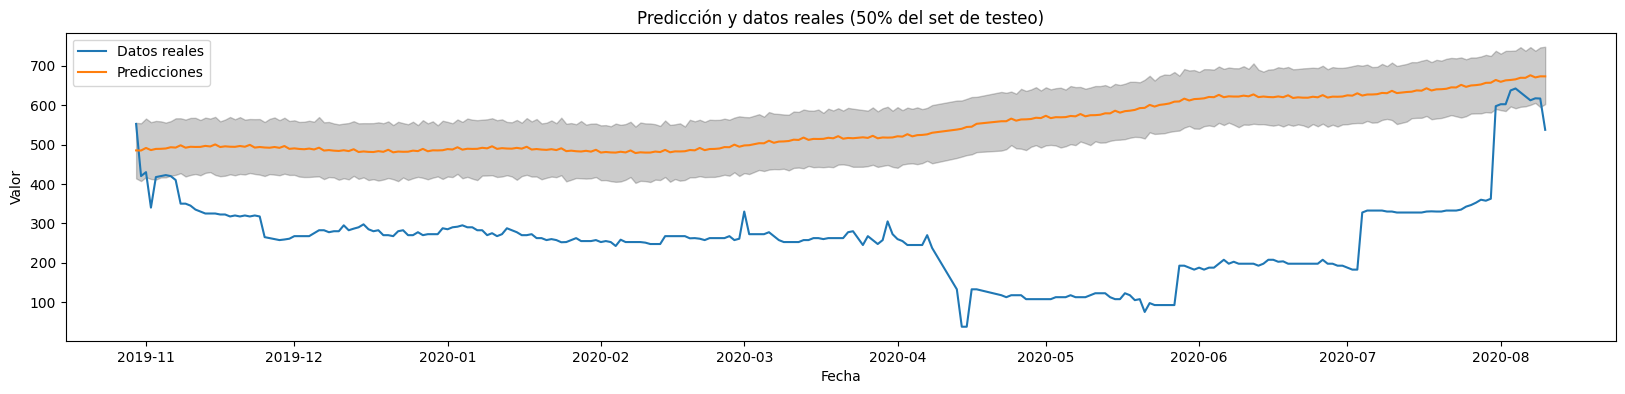

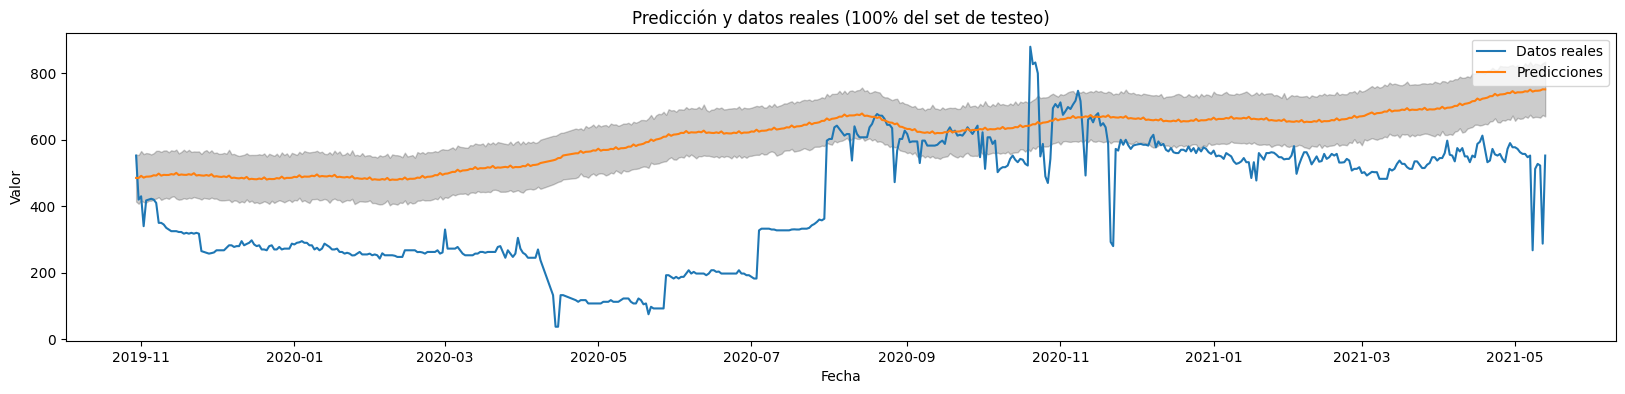

In [19]:
plot_predictions(df_test, forecast, 0.15)
plot_predictions(df_test, forecast, 0.50)
plot_predictions(df_test, forecast, 1.00)

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [21]:
merged = pd.merge(df_test, forecast[['ds', 'yhat']], on='ds', how='left')
rmse = mean_squared_error(merged['y'], merged['yhat'], squared=False)
mae = mean_absolute_error(merged['y'], merged['yhat'])
mape = np.mean(np.abs((merged['y'] - merged['yhat']) / merged['y'])) * 100

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

RMSE: 234.38785869981558
MAE: 194.6522421582966
MAPE: 87.55652148229377


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### **1.4 Festividades y fechas importantes**

Como a todos, a Don Sergio también le afectan las fechas importantes. Para ver como afectan estas fechas al presupuesto de Don Sergio tiene que realizar las siguientes tareas:

1. Crear dataframe con fechas importantes y agregar las al modelo con el argumento `holiday`.
2. Predecir las el dataframe de testeo
3. Comparar resultados. Hacer una tabla con resultados RMSE, MAE, MAPE anteriores y al añadir las festividades.


**1. Festividades y agregar a modelo**

**Respuesta**

Se utilizaron como fechas importantes las presentes en feriados.cl.

In [22]:
fechas_importantes_all = []

fechas_importantes = ['-01-01', '-03-29', '-03-30', '-05-01', 
                      '-05-21', '-06-09', '-06-20', '-06-29', 
                      '-07-16', '-08-15', '-09-18', '-09-19', 
                      '-09-20', '-10-12', '-10-27', '-10-31', 
                      '-11-01', '-11-24', '-12-08', '-12-25']

for i in range(13,23):
    for j in fechas_importantes:
        fechas_importantes_all.append(f'20{i}' + j)

In [23]:
df_holidays = pd.DataFrame({ 'holiday': 'important_holiday',
                            'ds': pd.to_datetime(fechas_importantes_all)})


In [24]:
model_with_holidays = Prophet(holidays = df_holidays)

In [25]:
model_with_holidays.fit(df_train)

23:07:35 - cmdstanpy - INFO - Chain [1] start processing
23:07:35 - cmdstanpy - INFO - Chain [1] done processing


**2. Predecir**

In [26]:
forecast2 = model_with_holidays.predict(df_test)

**3. Resultados**

/opt/conda/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


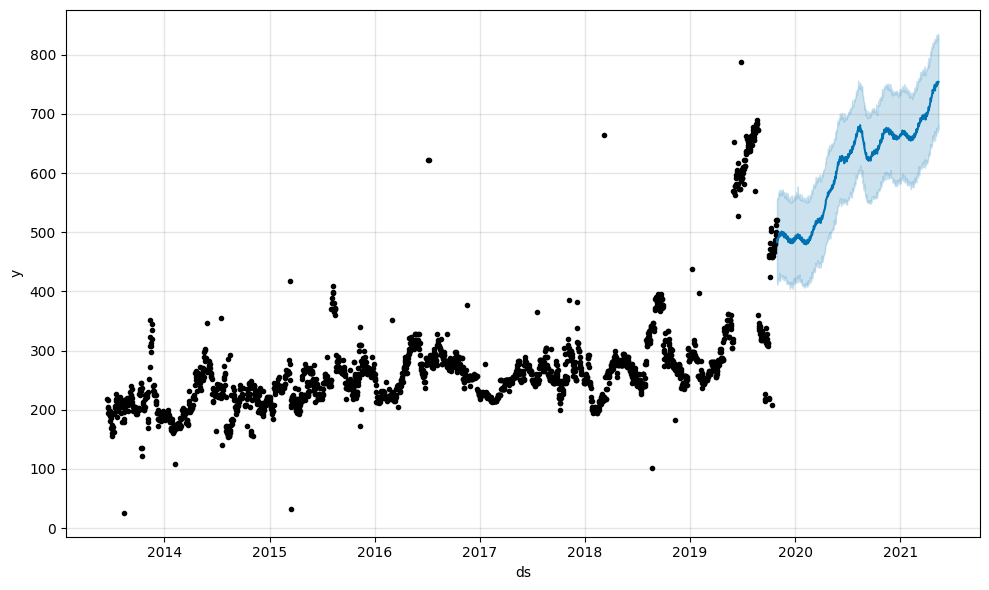

In [27]:
fig = model_with_holidays.plot(forecast2)
fig.show()

/opt/conda/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

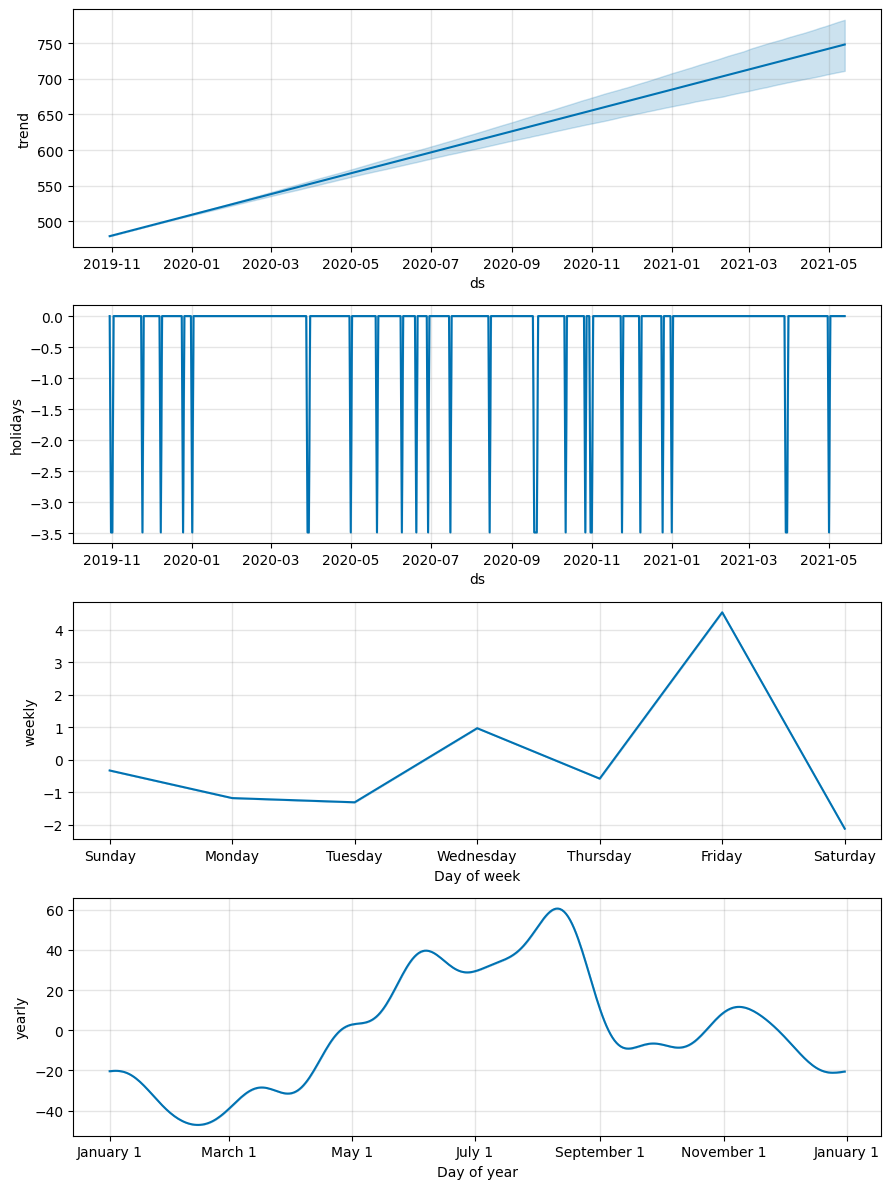

In [28]:
fig = model_with_holidays.plot_components(forecast2)

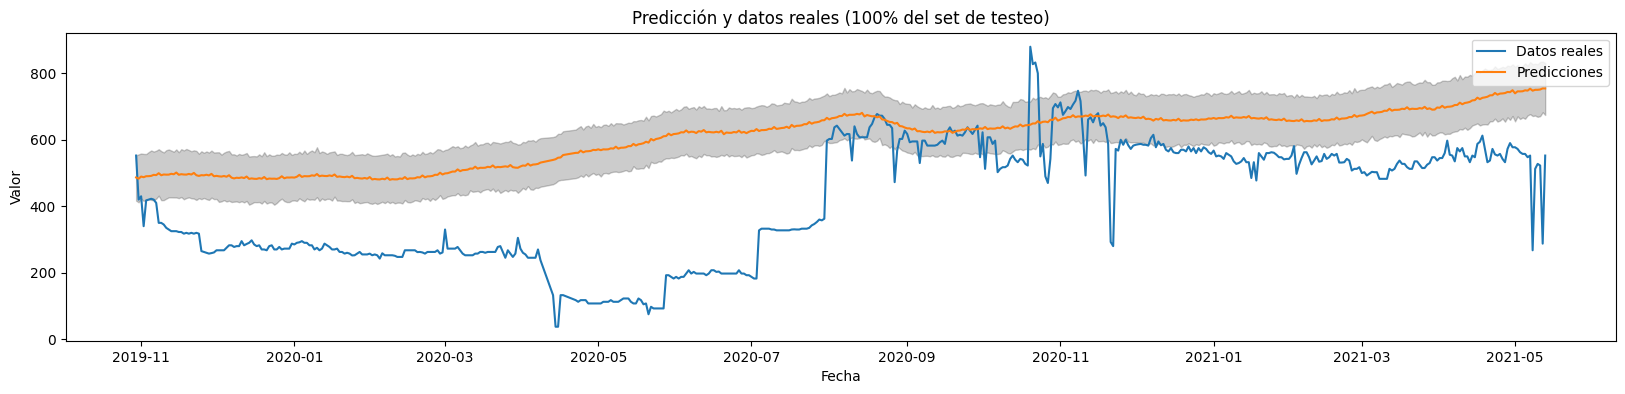

In [29]:
plot_predictions(df_test, forecast2, 1.00)

In [30]:
merged2 = pd.merge(df_test, forecast2[['ds', 'yhat']], on='ds', how='left')
rmse = mean_squared_error(merged2['y'], merged2['yhat'], squared=False)
mae = mean_absolute_error(merged2['y'], merged2['yhat'])
mape = np.mean(np.abs((merged2['y'] - merged2['yhat']) / merged2['y'])) * 100

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

RMSE: 235.64288059295455
MAE: 196.16059131702207
MAPE: 88.00977295075917


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


¿Son más precisas las predicciones? ¿Qué otro festividad podría afectar a los precios de las frutas y verduras?

**Respuesta**

Se observa un empeoramiento en las métricas de RMSE, MAE y MAPE, teniendo un aumento de 1.3, 1.5 y 0.5 respectivamente. Otras festividades que pueden ser relevantes son aquellas relacionadas a las celebraciones, com opuede ser el día de la madre o del padre, dónde se suelen comer cosas distintas.


#### **1.5 Regresores adicionales**


Don Sergio sabe que la fruta y la verdura tiene temporadas y que por eso hay fechas en que hay ciertas cosas más caras que otras. Además, sabe que este tipo de alimentos sube de precio en invierno, por lo que necesita que tenga en cuenta estas fechas.


---
 Para lograr lo anterior tendrán que:
 1. Crear regresor con 1 y 0's según corresponda, para las fechas de invierno. Tomar invierno desde el 21/junio hasta el 21/septiembre de todos los años.
 2. Agregar columna con el regresor tanto al dataframe original como al de testeo
 3. Entrenar y predecir. Gráficar resultados.

**P1**

In [31]:
def create_regressor(df):
    df['invierno'] = df['ds'].dt.strftime('%m-%d')
    df['invierno'] = df['invierno'].apply(lambda x: 0 if x < '06-21' else (0 if x > '09-21' else 1))
    return df

**P2**

In [32]:
df_train_regressor = create_regressor(df_train)

/tmp/ipykernel_992700/2911720540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['invierno'] = df['ds'].dt.strftime('%m-%d')
/tmp/ipykernel_992700/2911720540.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['invierno'] = df['invierno'].apply(lambda x: 0 if x < '06-21' else (0 if x > '09-21' else 1))


In [33]:
df_test_regressor =  create_regressor(df_test)

/tmp/ipykernel_992700/2911720540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['invierno'] = df['ds'].dt.strftime('%m-%d')
/tmp/ipykernel_992700/2911720540.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['invierno'] = df['invierno'].apply(lambda x: 0 if x < '06-21' else (0 if x > '09-21' else 1))


**P3**

In [34]:
model_with_regressor = Prophet()
model_with_regressor.add_regressor('invierno')

In [35]:
model_with_regressor.fit(df_train_regressor)

23:07:38 - cmdstanpy - INFO - Chain [1] start processing
23:07:38 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
forecast_regressor = model_with_regressor.predict(df_test[['ds', 'invierno']].copy())

/opt/conda/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


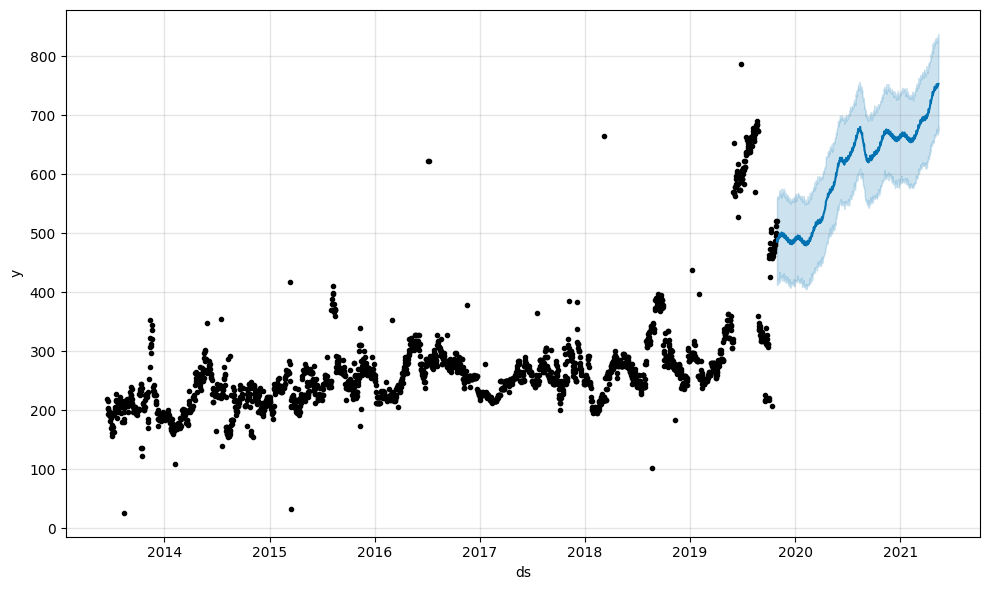

In [37]:
fig = model_with_regressor.plot(forecast_regressor)
fig.show()

/opt/conda/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

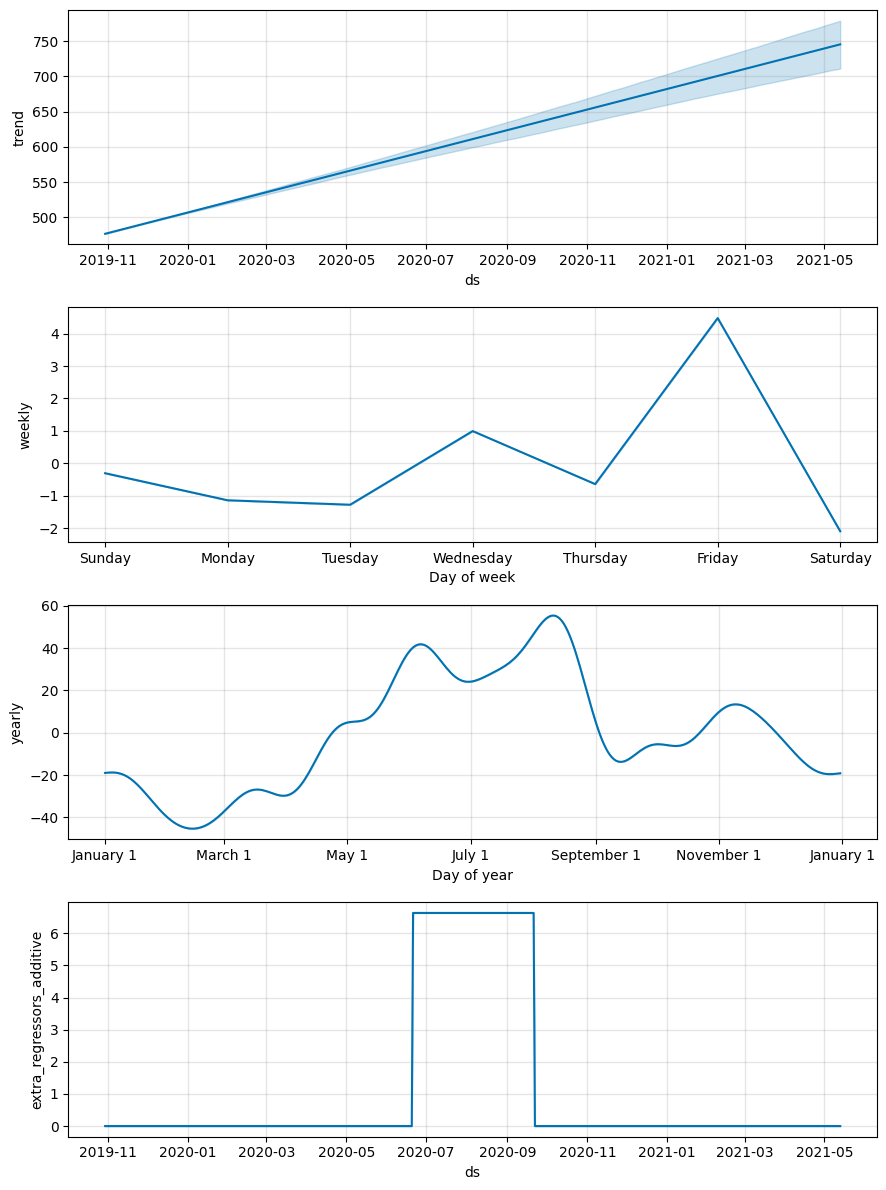

In [38]:
fig = model_with_regressor.plot_components(forecast_regressor)

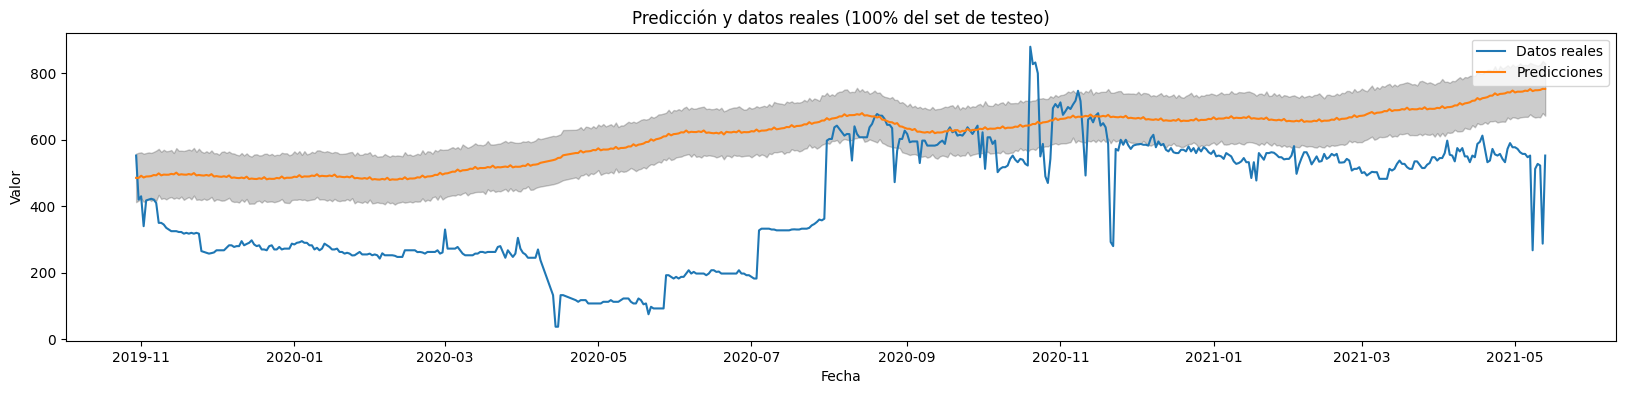

In [39]:
plot_predictions(df_test, forecast_regressor, 1.00)

# **Sistemas de Recomendación (3.0 puntos)**

<center>
<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Shopping_online_with_bank_card.jpg/1024px-Shopping_online_with_bank_card.jpg" / width = 350>

Como no todo en la vida es correr y nutrirse, don Sergio desarrollo el hábito de comprar online y pasa horas y horas en Amazon viendo distintos objetos que le podrían servir, pero no sabe qué comprar, por lo que usted tendrá que ayudarlo a buscar los elementos más comprados por sus amigos para que él también pueda probarlos.

---

Las tareas a realizar son:

1. Limpiar y explorar el dataset.
2. Recomendación por Ranking (baseline).
3. Recomendación basada en filtros colaborativos por usuarios.
4. Recomendaciones basadas en filtros colaborativos por items.



In [40]:
# se instala surprise library
# !pip install surprise

In [41]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD

import pandas as pd
from copy import deepcopy

Los datos presentan las siguientes columnas:
* `iderId`: ID único de cada usuario
* `productId:` ID único de cada producto
* `Rating:` Rating que un usuario le dio a un producto
* `timestamp:` Fecha del rating

In [42]:
df = pd.read_parquet('ratings_Electronics.parquet')
df = df.reset_index(drop = True)
df.head()

,user_id,prod_id,rating
0,3188,0,5.0
1,4980,0,4.0
2,5374,0,5.0
3,6293,0,5.0
4,4879,0,3.0


### **2.1.2 EDA (0.5 puntos)**

Habiendo limpiado los datos, generemos un pequeño análisis exploratorio:

Reportar la cantidad de usuarios y productos únicos:

In [43]:
# Respuesta
print('Usuarios únicos: ', len(df['user_id'].unique()))
print('Productos únicos: ', len(df['prod_id'].unique()))

Usuarios únicos:  8014
Productos únicos:  6727


Verificar que no hayan valores nulos

In [44]:
# Respuesta
df.isnull().sum()

user_id    0
prod_id    0
rating     0
dtype: int64

Graficar distribución de los ratings

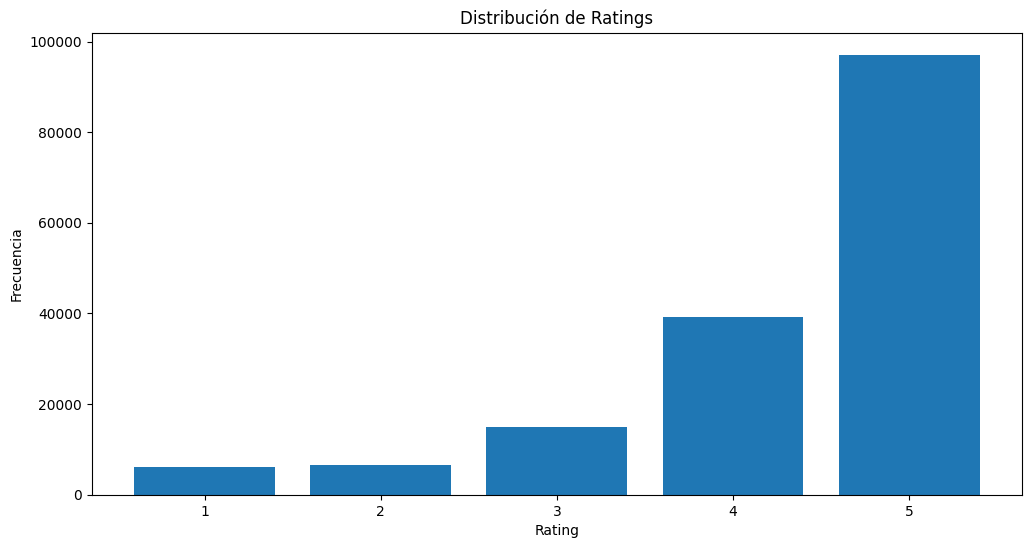

In [45]:
rating_count = df['rating'].value_counts().sort_index()

plt.figure(figsize = (12,6))
plt.bar(rating_count.index, rating_count.values)
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ratings')
plt.show()

Reportar las siguientes listas:

- Top 5 de usuarios con mayores interacciones
- Top 5 de productos con mayores inteacciones

In [46]:
# Respuesta
df.groupby('user_id').count().sort_values('prod_id', ascending = False)[:5]

,prod_id,rating
user_id,,
6703,283,283
5732,217,217
6273,206,206
1414,199,199
4665,179,179


In [47]:
df.groupby('prod_id').count().sort_values('user_id', ascending = False)[:5]

,user_id,rating
prod_id,,
5130,611,611
2843,542,542
5244,395,395
2525,371,371
6290,362,362


A partir de sus respuestas, escriba al menos 3 conclusiones.

Escriba sus observaciones aquí:

1. Los top 5 usuarios con mayor interacción tienen entre 179 y 283 interacciones, lo que muestra una diferencia considerable entre el más activo y el resto.
2. Los top 5 productos con mayor interacción tienen entre 362 y 611 interacciones, sugiriendo que hay productos que atraen más que otros.
3. El producto con id 5130 posee la mayor cantidad de interaciones que el usuario más activo, indicando que este atrae a una gran porción de estos.

## **2.2 Holdout**

Con los datos procesados, separe los datos de entrenamiento en train y test asignando 30% de los datos para el conjunto de test. Para replicabilidad de sus respuestas, fije la semilla en `42`.

In [48]:
reader = Reader(rating_scale=(0,5))

df_collaborative = df[['user_id', 'prod_id', 'rating']].copy() # ordenamos dataset en user, producto, rating (paso clave para trabajar con Surprise)
dataset = Dataset.load_from_df(df_collaborative, reader) # generamos Dataset de Surprise


In [49]:
from surprise.model_selection import train_test_split

# Respuesta
trainset, testset = train_test_split(dataset, test_size = 0.3, random_state = 42)

## **2.3 Baseline**

El objetivo de esta sección es generar un *baseline* en las recomendaciones a partir de una aproximación *dummy* para resolver el problema de recomendación. En particular, se le pide lo siguiente:
- Entrenar modelo baseline `NormalPredictor` de `surprise` con los datos de entrenamiento
- Generar predicciones usando el modelo entrenado
- Evaluar predicciones usando el error cuadrático medio. Entregue una interpretación de su resultado

In [50]:
from surprise.prediction_algorithms.random_pred import NormalPredictor
from surprise import accuracy

# Respuesta
model = NormalPredictor()
model.fit(trainset)

In [51]:
predictions = model.test(testset)

In [52]:
# Evaluar con MAE
from surprise.accuracy import mse
mae = accuracy.mae(predictions)
mse_score = mse(predictions)

MAE:  0.9914
MSE: 1.7805


**Respuesta**

El MAE obtenido indica que, en promedio, las predicciones del modelo difieren con los valores reales un aproximadamente 0.994 puntos, en la escala de 0 a 5.

## **Filtros Colaborativos Basados en Memoria**

A modo de mejorar esta sección, se le pide que implementar filtros colaborativos basados en memoria por medio de algoritmos basados en KNN. En específico, se le pide implementar:
- Filtro Colaborativo KNN enfocado en el Usuario
- Filtro Colaborativo KNN enfocado en el Producto
- Use `KNNBasic` y similitud coseno para ambos modelos

Luego **para cada uno de los modelos**, responda:

- Obtenga el error cuadrático medio de sus recomendaciones y comente. ¿Qué enfoque tienen un mejor rendimiento? ¿Se alcanza un mejor rendimiento con respecto al Baseline?
- Obtenga el rating que le asignaria el usuario `3` al producto `3906`. ¿Son diferentes sus resultados? ¿Porqué?
- Obtenga las 5 mejores recomendaciones para el usuario `2170` usando ambos enfoques y compare sus resultados.

*Hint: Le podría servir apoyarse de esta [documentación](https://surprise.readthedocs.io/en/stable/prediction_algorithms.html#similarity-measures-configuration).*

In [53]:
def get_user_top_k(predictions, user, k = 10):

    # predecir los rating filtrados por usuario user
    predicted_ratings = [pred for pred in predictions if pred.uid == user]

    # Ordenar las predicciones
    sorted_predicted_ratings = sorted(predicted_ratings, key = lambda x: x.est, reverse = True)

    return sorted_predicted_ratings[:k]

In [54]:
from surprise.accuracy import mse
from surprise import KNNBasic

# entrenar algoritmo

sim_options = {'name': 'cosine',
               'user_based': True}

# algoritmo base a usuario.
user_model = KNNBasic(sim_options = sim_options)

# entrenar
user_model.fit(trainset)

#predecir en dataframe de testeo
predictions = user_model.test(testset)

# retornar un dataframe con el rating estimado para cada (user_id, item_id)
df_predictions = pd.DataFrame([{'uid': pred.uid, 'iid': pred.iid, 'r_ui': pred.r_ui, 'est': pred.est} for pred in predictions])

# obtener mse
mae = accuracy.mae(predictions)
mse_score = mse(predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.7646
MSE: 1.2122


In [55]:
# ejemplo
example = [(3, 3906, None)]
print(user_model.test(example))
get_user_top_k(predictions, user = 2170, k = 5)

[Prediction(uid=3, iid=3906, r_ui=None, est=3.381966011250105, details={'actual_k': 3, 'was_impossible': False})]


[Prediction(uid=2170, iid=2679, r_ui=4.0, est=5, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid=2170, iid=1326, r_ui=5.0, est=4.799755049750801, details={'actual_k': 5, 'was_impossible': False}),
 Prediction(uid=2170, iid=4650, r_ui=5.0, est=4.399861310283875, details={'actual_k': 5, 'was_impossible': False}),
 Prediction(uid=2170, iid=1692, r_ui=4.0, est=4.333333333333333, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid=2170, iid=4363, r_ui=5.0, est=4.199459547276517, details={'actual_k': 15, 'was_impossible': False})]

In [56]:
# entrenar algoritmo base a items, obtener MSE

sim_options = {'name': 'cosine', 
               'user_based': False}

# algoritmo base a items.
item_model = KNNBasic(sim_options = sim_options)

# entrenar
item_model.fit(trainset)

#predecir en dataframe de testeo
predictions = item_model.test(testset)

df_predictions = pd.DataFrame([{'uid': pred.uid, 'iid': pred.iid, 'r_ui': pred.r_ui, 'est': pred.est} for pred in predictions])

# obtener mse
mae = accuracy.mae(predictions)
mse_score = mse(predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.7535
MSE: 1.2328


In [57]:
example = [(3, 3906, None)]
print(item_model.test(example))

get_user_top_k(predictions, user = 2170, k = 5)

[Prediction(uid=3, iid=3906, r_ui=None, est=2.5, details={'actual_k': 4, 'was_impossible': False})]


[Prediction(uid=2170, iid=1692, r_ui=4.0, est=5, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid=2170, iid=1326, r_ui=5.0, est=5, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid=2170, iid=2679, r_ui=4.0, est=5, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid=2170, iid=3595, r_ui=5.0, est=4.857142857142857, details={'actual_k': 7, 'was_impossible': False}),
 Prediction(uid=2170, iid=4650, r_ui=5.0, est=4.856937449847549, details={'actual_k': 7, 'was_impossible': False})]

**Respuestas**

 1. Se calculó tanto el MAE, como el MSE, para poder comparar con el *baseline*. En ambos aspectos, tanto el filtro colaborativo enfocado en usuarios, como en items, tienen mejor rendimiento respecto al *baseline*. Sin embargo, entre estos dos, existe una diferente entre el MAE y MSE que poseen. Si nos enfocamos en el MAE, se tiene que el enfocado en items en mejor; mientras que si nos enfocamos en el MSE, el fitro enfocado a usuarios es mejor. Esto indica que el enfocado en items las predicciones son ligeramente mejores, y que en el enfocado a usuarios e menos sensible a los errores en las predicciones, por lo que para elegir cual tiene un mejor rendimiento, hay que definir que se busca, precisión promedio de las predicciones (filtro enfocado en items) o minimizar el impacto de los grandes errores (filtro enfocado en usuarios).
 
 2. Son distintos los resultados. El porque viene dado por el cómo se calculan estos. En el caso de enfocado a usuarios, se calculan las similitudes entre los usuarios basándose en los ratings que le han puesto a los items; mientras que en el enfocado a items, se calculan las similitudes entre los items basándose en los ratings que han recibido por parte de los usuarios.
 
 3. Al obtener el top 5 recomendaciones con ambos enfoques, se obtienen los mismos resultados, a excepción de 1, correspondiente al 4363 en el enfocado a usuarios y al 3595 en el enfocado a items; pero con diferentes rating (por ende posición). Esto quiere decir que los resultados son consistentes entre los modelos, pero la diferencia entre los rating destacan las variaciones de precisión que existen entre los modelos, las cuales no son significativamente distintas.

## **Filtros Colaborativos Basados en Modelo**

Finalmente, se le pide implementar el modelo `SVD` para resolver el problema. Al igual que en las secciones anteriores, entrene este modelo y luego evalúe sus predicciones en el conjunto de test. Luego, responda:

- ¿En qué se diferencia este tipo de modelos de los modelos basados en memoria?
- ¿Qué significa el parámetro `num_factors`? ¿De qué manera podría impactar en el ajuste del modelo?
- ¿Qué indican los parámetros $\mu$, $b_u$, $b_i$? ¿Qué cuidado se debe tener al utilizarlos?
- Obtenga el error cuadrático medio de sus recomendaciones y comente. ¿Se alcanza un mejor rendimiento con respecto al Baseline?
- Obtenga el rating que le asignaria el usuario `3` al producto `3906`. ¿Son diferentes sus resultados? ¿Porqué?
- Obtenga las 5 mejores recomendaciones para el usuario `2170` usando ambos enfoques y compare sus resultados.

**Respuestas**

1. La principal diferencia entre los modelos basados en memoria utilizados y el SVD, es que el primero utiliza las similitudes existentes entre los atributos (en este caso la similitud coseno entre usuarios o items); mientras que el segundo descompone la matriz de rating entregada en un conjunto de factores latentes que representan las caracteristicas de los usuarios e items, intentando reducir la dimensionalidad de estos y capturar las relaciones en los datos.

2. *num_factors* corresponde al número de factores latentes que se utilizan para representar a los usuarios y a los items en el espacio latente, lo que se traduce en el tamaño de los vectores representativos. A un mayor número de factores se puede capturar más variabilidad en los datos, pudiendo mejorar la precisión, pero existiendo el riesgo de *overfitting*.

3.  $\mu$ corresponde al promedio global de todos los ratings; $b_u$ es el sesgo del usuario, que representa la desviación del ususario respecto al promedio global; y $b_i$? corresponde al sesgo del item, que representa la desviaicón del item con respecto al promedio global. El principal cuidado que se debe tener al utilizarlos es que estos ajustan las predicciones para eliminar efectos sistemáticos incorporados, por lo que podrían traen problemas de *overfitting*.

4. Tanto en MAE, como en MSE, se obtiene un mejor rendimiento comparando con el *baseline* y los filtros colaborativos enfocados a usuarios e items.

5. Es distinto el resultado con respecto a los otros filtros colaborativos desarrollados, debiendose principalmente al como se calculan estas predicciones, explicado en la pregunta 1 de esta sección.

6. El resultado difiere de 2 items con el filtro enfocado a usuarios, y de 1 item con el filtro enfocado a items; con distintos valores de rating.


In [58]:
# Respuesta
from surprise import SVD

model = SVD()
model.fit(trainset)

# predicciones, retornar un dataframe con el rating estimado para cada (user_id, item_id)
predictions = model.test(testset)
df_predictions = pd.DataFrame([{'uid': pred.uid, 'iid': pred.iid, 'r_ui': pred.r_ui, 'est': pred.est} for pred in predictions])


In [59]:
# calcular mae
from surprise.accuracy import mae

mae = mae(predictions)
mse_score = mse(predictions)

MAE:  0.6949
MSE: 0.9115


In [60]:
example = [(3, 3906, None)]
print(model.test(example))

[Prediction(uid=3, iid=3906, r_ui=None, est=3.0977119102395574, details={'was_impossible': False})]


In [61]:
get_user_top_k(predictions, user = 2170, k = 5)

[Prediction(uid=2170, iid=1692, r_ui=4.0, est=5, details={'was_impossible': False}),
 Prediction(uid=2170, iid=4650, r_ui=5.0, est=4.965714431028025, details={'was_impossible': False}),
 Prediction(uid=2170, iid=1326, r_ui=5.0, est=4.937762084421032, details={'was_impossible': False}),
 Prediction(uid=2170, iid=5990, r_ui=4.0, est=4.873661395933272, details={'was_impossible': False}),
 Prediction(uid=2170, iid=3595, r_ui=5.0, est=4.7489187316870956, details={'was_impossible': False})]

### **Comentarios Finales**

* ¿Qué sistema de recomendación presenta mejores métricas? ¿A qué se podría deber esto?
* ¿Es posible mejorar sus resultados? Si es así, proponga al menos 2 mejoras.

**Respuesta**

1. El que presenta mejores métricas es el filtro colaborativo basado en modelo SVD, tanto por MAE, como por MSE. Esto se puede deber al como se representan los atributos, por medio de la descomposición matricial, haciendo que los datos se ajusten de mejor manera a modelo.

2. Si es posible mejorar el modelo. Una de las mejoras puede ser la incorporación de más datos descriptivos (*features*) enfocados al usuario, como su edad, género o ubicación; al igual que enfocandose en los items, como el precio o a la categoría a la que pertenece; con el fin de generar modelos que puedan caracterizar de mejor manera y proyectar de forma más precisa en el hiperplano los distintos vectores. Otro aspecto que se puede mejorar son los hiperparámetros, mediante una optimización de estos, como el número de factores utilizados.
